<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Zac/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [4]:
crypto = 'ETH'
currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,0.954822,0.931442,0.933712,0.948024,2.060620e+05,0.948024
2016-01-02,0.969637,0.936560,0.947401,0.937124,2.555040e+05,0.937124
2016-01-03,0.991362,0.934313,0.938430,0.971905,4.076320e+05,0.971905
2016-01-04,0.976438,0.929835,0.972045,0.954480,3.462450e+05,0.954480
2016-01-05,0.970597,0.946543,0.953147,0.950176,2.198330e+05,0.950176
...,...,...,...,...,...,...
2021-06-25,1850.179810,1719.559448,1810.884277,1829.239258,2.063754e+10,1829.239258
2021-06-26,1979.958130,1811.245850,1830.996948,1978.894653,1.988547e+10,1978.894653
2021-06-27,2139.805420,1963.615479,1981.386475,2079.657471,2.551460e+10,2079.657471


In [7]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [8]:
pred_days = 30 # no. of days you're considering for the prediction

In [9]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [11]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
62/62 [==============================] - 8s 47ms/step - loss: 0.0039
Epoch 2/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0017
Epoch 3/30
62/62 [==============================] - 3s 46ms/step - loss: 0.0013
Epoch 4/30
62/62 [==============================] - 3s 45ms/step - loss: 0.0014
Epoch 5/30
62/62 [==============================] - 3s 47ms/step - loss: 0.0014
Epoch 6/30
62/62 [==============================] - 3s 45ms/step - loss: 0.0010
Epoch 7/30
62/62 [==============================] - 3s 46ms/step - loss: 0.0012
Epoch 8/30
62/62 [==============================] - 3s 46ms/step - loss: 0.0011
Epoch 9/30
62/62 [==============================] - 3s 45ms/step - loss: 8.7549e-04
Epoch 10/30
62/62 [==============================] - 3s 47ms/step - loss: 8.1420e-04
Epoch 11/30
62/62 [==============================] - 3s 46ms/step - loss: 8.0168e-04
Epoch 12/30
62/62 [==============================] - 3s 45ms/step - loss: 7.6112e-04
Epoch 13/30
62/62 [==

In [12]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto}-{currency}", "yahoo", test_start, test_end)

In [13]:
test_data.index = pd.to_datetime(test_data.index)

In [14]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,1.365200e+10,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,1.974077e+10,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,4.520046e+10,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,5.694599e+10,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,4.153593e+10,1100.006104
...,...,...,...,...,...,...
2021-06-25,1850.179810,1719.559448,1810.884277,1829.239258,2.063754e+10,1829.239258
2021-06-26,1979.958130,1811.245850,1830.996948,1978.894653,1.988547e+10,1978.894653
2021-06-27,2139.805420,1963.615479,1981.386475,2079.657471,2.551460e+10,2079.657471


In [15]:
actual_prices = test_data['Close']

In [16]:
actual_prices = np.array(actual_prices)
actual_prices

array([ 730.36755371,  774.53497314,  975.50769043, 1040.23303223,
       1100.00610352, 1207.11218262, 1225.67810059, 1224.19714355,
       1281.07727051, 1262.2467041 , 1090.14538574, 1043.43457031,
       1130.73937988, 1218.45300293, 1171.83459473, 1233.53759766,
       1230.17224121, 1257.27954102, 1377.29589844, 1382.27404785,
       1121.57092285, 1236.51220703, 1230.99060059, 1391.609375  ,
       1324.41479492, 1357.05810547, 1253.18713379, 1298.10180664,
       1382.52282715, 1376.11547852, 1314.98620605, 1369.04052734,
       1515.19372559, 1660.9095459 , 1594.76269531, 1718.65087891,
       1677.84680176, 1614.2277832 , 1746.61682129, 1768.03503418,
       1744.2434082 , 1783.79797363, 1843.53259277, 1814.10986328,
       1805.08410645, 1779.79101562, 1781.06750488, 1848.45825195,
       1937.44921875, 1960.16479492, 1919.53405762, 1935.60107422,
       1781.99291992, 1570.20397949, 1626.57568359, 1475.70373535,
       1446.03369141, 1459.97314453, 1416.0489502 , 1564.70764

In [17]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [18]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [19]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [20]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

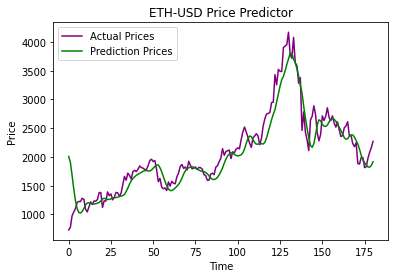

In [25]:
plt.plot(actual_prices, color='purple', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()